In [1]:
import cobra 
import pkg_resources
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from typing import Iterable, Any, List, Dict, TypeVar, cast

from moped import Model

T = TypeVar("T")

In [2]:

T = TypeVar("T")
def snd(x: Any, y: T) -> T:
    return y

def flatten(x: Iterable[Iterable[Any]]) -> List[Any]:
    return [j for i in x for j in i]


def group_mask(groups: Dict[str, List[str]]) -> List[int]:
    return flatten([it.repeat(num, len(group)) for num, group in enumerate(groups.values())])

In [3]:
 def scope_comparison(file):
    m = Model()
    m.read_from_bigg(file)
    m.cofactor_duplication()
    m.reversibility_duplication()
    Scopes = {}
    for i in m.compounds:
        _, cpd = m.scope(["h2o_c", i])
        Scopes[i] = len(cpd)
    Scopes2 = {}
    for i in m.compounds:
        _, cpd = m.scope(["h2o_c", i] + list(m.cofactor_pairs.keys()))
        Scopes2[i] = len(cpd) - len(list(m.cofactor_pairs.keys()))

    Scopes3 = {}
    for i in m.compounds:
        _, cpd = m.scope(["h2o_c", i] + m.get_strong_cofactor_duplications())
        Scopes3[i] = len([i for i in cpd if not cast(str, i).endswith("__cof__")])
    return pd.DataFrame(
        {
            "without cof.": Scopes,
            "actual cof.": Scopes2,
            "cof. duplicates": Scopes3,
        }
    )


def plot_scope(df, ax, name):
    df["without cof."].sort_values().plot(ax=ax, linewidth=3)
    df["actual cof."].sort_values().plot(ax=ax, linewidth=3)
    df["cof. duplicates"].sort_values().plot(ax=ax, linewidth=3)
    ax.set(xticks=[])
    ax.grid()
    ax.set_xlabel("Metabolites")
    ax.set_ylabel("Number of producible Metabolites")
    ax.legend()
    ax.set_title(name, fontsize=15)
    return ax

In [4]:
def snd(x: Any, y: T) -> T:
    return y

def flatten(x: Iterable[Iterable[Any]]) -> List[Any]:
    return [j for i in x for j in i]


def group_mask(groups: Dict[str, List[str]]) -> List[int]:
    return flatten([it.repeat(num, len(group)) for num, group in enumerate(groups.values())])

In [5]:
m = Model()
m.read_from_bigg('/home/student/Downloads/new_thecaphora.xml')

m.cofactor_duplication()
m.reversibility_duplication()

scope_compounds = [i for i in m.compounds if "C" in m.compounds[i].formula and i[-2:] != "_e"]
scopes = {
    i: len(snd(*m.scope([i, "h2o_c"] + m.get_weak_cofactor_duplications())))
    for i in scope_compounds 
}

'' is not a valid SBML 'SId'.


m = Model()
m.read_from_sbml('/home/student/Downloads/new_thecaphora.xml')


In [6]:
for strong_cofactor_base_id, weak_cofactor_base_id in {
            "ATP": "ADP",
            "GTP": "GDP",
            "NADH": "NAD",
            "NADPH": "NADP",
            "10-FORMYL-THF": "THF",
            "METHYLENE-THF": "THF",
            "5-METHYL-THF": "THF",
            "ACETYL-COA": "CO-A",
            "Donor-H2": "Acceptor",
            "Reduced-ferredoxins": "Oxidized-ferredoxins",
            "Red-NADPH-Hemoprotein-Reductases": "Ox-NADPH-Hemoprotein-Reductases",
            "Cytochromes-C-Reduced": "Cytochromes-C-Oxidized",
            "Plastocyanin-Reduced": "Oxidized-Plastocyanins",
            "ETF-Reduced": "ETF-Oxidized",
            "Red-Thioredoxin": "Ox-Thioredoxin",
            "CPD-12829": "PLASTOQUINONE-9",
        }.items():
    m.add_cofactor_pair(strong_cofactor_base_id,weak_cofactor_base_id)
m.cofactor_duplication()
m.reversibility_duplication()
z=m.cofactor_pairs
len(z)
z

{'ATP_c': 'ADP_c',
 'ATP_p': 'ADP_p',
 'ATP_e': 'ADP_e',
 'GTP_c': 'GDP_c',
 'GTP_p': 'GDP_p',
 'GTP_e': 'GDP_e',
 'NADH_e': 'NAD_e',
 'NADH_c': 'NAD_c',
 'NADPH_e': 'NADP_e',
 'NADPH_c': 'NADP_c',
 '10-FORMYL-THF_c': 'THF_c',
 '10-FORMYL-THF_e': 'THF_e',
 'METHYLENE-THF_e': 'THF_e',
 'METHYLENE-THF_c': 'THF_c',
 '5-METHYL-THF_c': 'THF_c',
 '5-METHYL-THF_e': 'THF_e',
 'ACETYL-COA_c': 'CO-A_c',
 'ACETYL-COA_e': 'CO-A_e',
 'Donor-H2_e': 'Acceptor_e',
 'Donor-H2_c': 'Acceptor_c',
 'Reduced-ferredoxins_e': 'Oxidized-ferredoxins_e',
 'Reduced-ferredoxins_c': 'Oxidized-ferredoxins_c',
 'Red-NADPH-Hemoprotein-Reductases_c': 'Ox-NADPH-Hemoprotein-Reductases_c',
 'Red-NADPH-Hemoprotein-Reductases_e': 'Ox-NADPH-Hemoprotein-Reductases_e',
 'Cytochromes-C-Reduced_c': 'Cytochromes-C-Oxidized_c',
 'Cytochromes-C-Reduced_e': 'Cytochromes-C-Oxidized_e',
 'ETF-Reduced_c': 'ETF-Oxidized_c',
 'ETF-Reduced_e': 'ETF-Oxidized_e',
 'ETF-Reduced_p': 'ETF-Oxidized_p',
 'Red-Thioredoxin_e': 'Ox-Thioredoxin_e',


In [7]:
medium=['AMMONIA_c','Pi_c','SULFATE_c','PROTON_c','WATER_c','OXYGEN-MOLECULE_c']


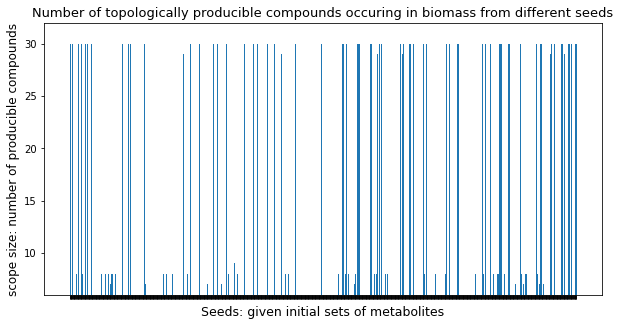

In [8]:
scopes_content = { # Dictionary ( Jedem Metabolit wird eine Liste zugeordnet )
    i: list(snd(*m.scope([i]+medium + m.get_weak_cofactor_duplications())))
    for i in scope_compounds 
}


# Liste der Metabolite, bei denen ein Element aus m.reactions['BIOMASS'].stoichiometries in der Liste ist
scopes_compounds_new=[] 
# Dictionary : Für jedes Metabolidit i wird die Kardinalität 
#des Schnitts aus  m.reactions['BIOMASS'].stoichiometries und der Liste scopes_content[i] zugeordnet 
# i wird dem dictionary nicht zugeordnet, falls der Schnitt leer ist.
scopes_content_dict={}
for i in list(scopes_content):
    cnt=0
    for j in list(m.reactions['BIOMASS'].stoichiometries):
        if j in scopes_content[i]:
            cnt+=1
    if cnt>0:
        scopes_compounds_new.append(i)
        scopes_content_dict[i]=cnt

x = scopes_compounds_new
y = [scopes_content_dict[i] for i in x]


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, y, width=1.5)
ax.set_ylim(6, 32)
ax.set_xticks(range(len(x)))
ax.set_xticklabels([], rotation=90, fontsize=5, fontweight="bold")
ax.set_ylabel("scope size: number of producible compounds", fontsize=12)
plt.title('Number of topologically producible compounds occuring in biomass from different seeds', fontsize=13)

plt.xlabel('Seeds: given initial sets of metabolites', fontsize=12.5)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/Metabolic scope size of compounds.pdf', bbox_inches="tight")
plt.show()



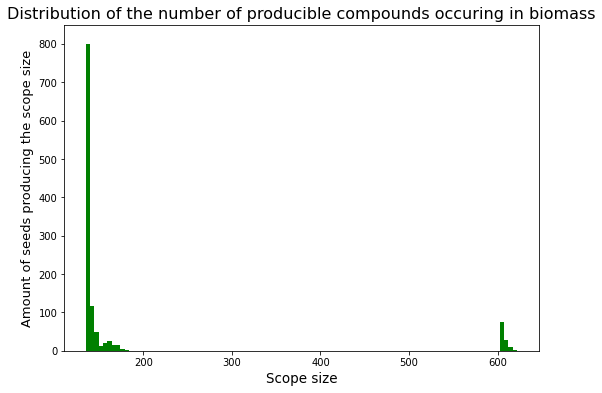

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8.5,6))


plt.ylabel('Amount of seeds producing the scope size', fontsize=13)
plt.xlabel('Scope size', fontsize=13.5)
plt.title('Distribution of the number of producible compounds occuring in biomass', fontsize=16)
plt.ylim(0, 850)
plt.hist(y,100,color='green')
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/scope distribution occuring in biomass.pdf', bbox_inches="tight")

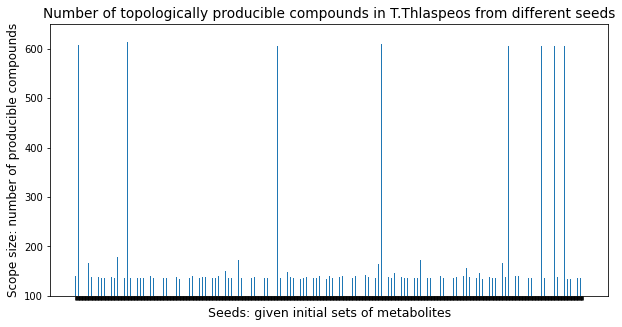

In [10]:
scope_compounds = [i for i in m.compounds if "C" in m.compounds[i].formula and i[-2:] != "_e"]
scopes = {
    i: len(snd(*m.scope([i]+medium + m.get_weak_cofactor_duplications())))
    for i in scope_compounds 
}

x=scope_compounds

y=[]

for i in scope_compounds:
    if scopes[i]>100:
        y.append(scopes[i])



fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, y, width=0.2, alpha=1)
ax.set_ylim(100, 650)
ax.set_xticks(range(len(x)))
ax.set_xticklabels([], rotation=90, fontsize=5, fontweight="bold")
ax.set_ylabel("Scope size: number of producible compounds", fontsize=12)

plt.xlabel('Seeds: given initial sets of metabolites', fontsize=12.5)
plt.title('Number of topologically producible compounds in T.Thlaspeos from different seeds', fontsize=13.7)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/new_thecaphora_scope_sizes.pdf', bbox_inches="tight")
plt.show()

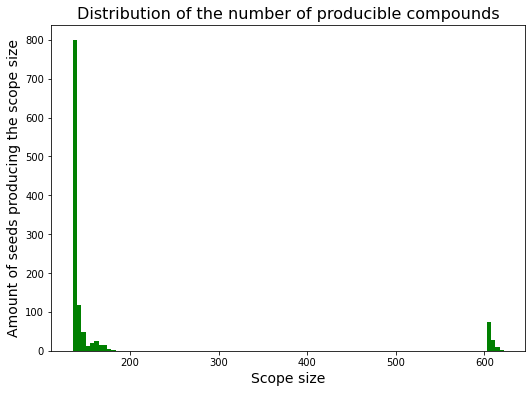

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8.5,6),edgecolor='blue')


plt.ylabel('Amount of seeds producing the scope size', fontsize=14)
plt.xlabel('Scope size', fontsize=14)
plt.title('Distribution of the number of producible compounds', fontsize=16)
plt.hist(y,100,color='green')


#plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/scope distribution.pdf', bbox_inches="tight")